In [ ]:
#dummy data
X_train = []
y_train = []
X_test = []
y_test = []

# **CLASSIFICATION FUNCTIONS**

## **PART-1**
<u> sklearn APIs for Classification </u>

### **RidgeClassifier API**

  

* RidgeClassifier is a classifier variant of the Ridge regressor.

* Binary Classification:
  * classifier first converts binary targets to {-1,1} and then treats the problem as a regression task, optimizing the objective of regressor:

    * minimize a penalized residual sum of squares

     `min w || Xw - y ||^2 + α ||w||^2`
      * sklearn provides different solvers for this optimization
      * sklearn uses α to denote regularization rate
    
    * predicted class corresponds to the sign of the regressor's prediction
  
* Multiclass Classification:

    * treated as multi-output regression
    * predicted class corresponds to the output with the highest values

##### 1. How to train a least square classifier?

Step-1

Instantiate a classification estimator without passing any arguments to it. This creates a ridge classifier object.

In [ ]:
from sklearn.linear_model import RidgeClassifier
RC = RidgeClassifier()

Step-2

Call `fit` method on ridge classifier object with training feature matrix and label vector as arguments.


In [ ]:
RC.fit(X_train, y_train)

##### 2. How to set regularization rate ?

Set `alpha` to float value. The default value is 0.1
  * alpha should be positive
  * Larger alpha values specify stronger regularization

In [ ]:
RC = RidgeClassifier(alpha = 0.001)

##### 3. How to solve optimization problem in RidgeClassifier?

By using one of the following solvers:

  * `svd`

  uses a Singular Value Decomposition of the feature matrix to compute the Ridge coefficients.

  * `cholesky`

  uses `scipy.linalg.solve` function to obtain the closed-form solution

  * `sparse_cg`
  
  uses the conjugate gradient solver of `scipy.sparse.linalg.cg`

  * `lsqr`
  
  uses the dedicated regularized least-squares routine `scipy.sparse.linalg.lsqr` and it is the fastest

  * `sag` , `saga`

  uses a Stochastic Average Gradient descent iterative procedure
  
  'saga' is unbiased and more flexible version of 'sag'

  * `lbfgs`

  uses L-BFGS-B algorithm implemented in `scipy.optimize.minimize`

  can be used only when coefficients are forced to be positive

Uses of solver in RidgeClassifier

  * For large scale data, use `sparse_cg` solver
  
  * When both `n_samples` and `n_features` are large, use `sag` or `saga` solvers

##### 4. How to make RidgeClassifier select the solver automatically?

In [ ]:
RC = RidgeClassifier(solver = 'auto')

`auto` chooses the solver automatically based on the type of data

default choice for solver is `auto`

##### 5. Is intercept estimation necessary for RidgeClassifier?

If data is already centered, set `fit_intercept` as false, so that no intercept will be used in calculations

In [ ]:
#by default

RC = RidgeClassifier(fit_intercept = True)

##### 6. How to make predictions on new data samples?

Use `predict` method to predict class labels for samples

Step1 : Arrange data for prediction in a feature matrix of shape or in sparse matrix format

Step2 : Call `predict` method on classifier object with feature matrix as an argument

In [ ]:
#Predict labels for feature matrix X_test

y_pred = RC.predict(X_test)

Other classifiers also use the same predict method

### **Perceptron API**

* It is a simple classification algorithm suitable for large-scale learning.
* Shares the same underlying implementation with `SGDClassifier`

`Perceptron()` ~ `SGDClassfier(loss = 'perceptron', eta0 = 1, learning_rate = 'constant', penalty = None)`

* Perceptron uses SGD for training.

* Perceptron classifer can be trained in an iterative manner with `partial_fit` method.

* Perceptron classifier can be initialized to the weights of the previous run by specifying `warm_start = True` in the constructor.



##### **1. How to implement perceptron classifier?**

Step-1

Instantiate a Perceptron estimator without passing any arguments to it to create a classifier object.

In [ ]:
from sklearn.linear_model import Perceptron
perceptron_classifier = Perceptron()

Step-2

Call `fit` method on perceptron estimator object with training feature matrix and label vector as arguments.

In [ ]:
perceptron_classifier.fit(X_train, y_train)

##### **2. Parameters**

Perceptron can be further customized with the following parameters:

`penalty` (default = 'l2')

`l1_ratio` (default = 0.15)

`alpha` (default = 0.0001)

`early_stopping` (default = False)

`fit_intercept` (default = True)

`max_iter` (default = 1000)

`n_iter_no_change` (default = 5)

`tol` (default = 1e-3)

`eta0` (default = 1)

`validation_fraction` (default = 0.1)

### **LogisticRegression API**

* Implements logistic regression classifier, which is also known by a few different names like _logit regression_, _maximum entropy classifier (maxent)_ and _log-linear_ classifier.

  `arg min w,C  regularization penalty + C cross entropy loss`

* This implementation can fit
  * binary classification
  * one-vs-rest (OVR)
  * multinomial logistic regression

* Provision for $𝒍_1$, $𝒍_2$ or elastic-net regularization

##### **1. How to train LogisticRegressionn classifier?**

Step-1

Instantiate a classifier estimator without passing any args to it. This creates a logistic regression object.

In [ ]:
from sklearn.linear_model import LogisticRegression
logitC = LogisticRegression()

Step-2

Call `fit` method on logistic regression classifier object with training feature matrix and label vector as args.

In [ ]:
logitC.fit(X_train, y_train)

##### **2. How to select solvers for Logistic Regression classifier?**

* Logistic Regression uses specific algorithms for solving the optimization problems in training. These algorithms are known as `solvers`.

* The choice of the solver depends on the classification problem set up such as size of the dataset, number of features and labels.

`solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`

* For <u>*small datasets*</u>, `liblinear` is a good choice, whereas `sag` and `saga` are faster for <u>*large ones*</u>.

* For <u>*unscaled datasets*</u>, `liblinear`, `lbfgs` and `newton-cg` are robust.

* For <u>*multiclass problems*</u>, only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss. `liblinear` is limited to <u>*one-versus-rest*</u> schemes.

By default, logistic regression uses `lbfgs` solver.

In [ ]:
logitC = LogisticRegression(solver = 'lbfgs')

##### **3. How to add regularization in Logistic Regression Classifier?**

* Regularization is applied by default because it improves numerical stability.
* By default, it uses L2 penalty.
* Following are the penalties we can use:

  `penalty = ['l1', 'l2', 'elasticnet', None]`

In [ ]:
logitC = LogisticRegression(penalty = 'l2')

* Not all solvers supports all the penalties.
* Select appropriate solver for the desired penalty.
  * l2 penalty is supported by all solvers

Solver      | Penalty
------------|---------
`newton-cg` | `'l2'`, `None`
`lbfgs`     | `'l2'`, `None`
`liblinear` | `'l2'`, `'l1`
`sag`       | `'l2'`, `None`
`saga `     | `elasticnet`, `l1`, `'l2'`, `None`

##### **4. How to control amount of regularization in logistic regression?**

* sklearn implementation uses parameter C, which is inverse of regularization rate to control regularization.

* Recall
  `arg min w,C regularization penalty + C cross entropy loss`

* C is specified in the constructor and must be positive.
  * Smaller value leads to stronger regularization.
  * Larger value leads to weaker regularization.

##### **5. class_weight Parameter**

LogistiRegression classifier has a `class_weight` parameter in its constructor.

What purpose does it serve?

  * Handles class imbalance with differential class weights.
  * Mistakes in a class are penalized by the class weight.
    * Higher value here would mean higher emphasis on the class.


##### **6. LogisticRegressionCV**

LogisticRegressionCV implements logistic regression with in built cross validation support to find the <u>best values</u> of `C` and `l1_ratio` parameters according to the specified `scoring` attribute.

### **SGDClassifier**

* SGD is very efficient approach to fitting classifiers under <u> convex loss functions </u>

* This API uses SGD as an <u>optimization technique</u> and can be applied to build a variety of linear classifiers by adjusting the loss parameter.

* It supports **multi-class classification** by combining multiple binary classifiers in a <u>"one versus all"</u> (OVA) scheme.

* Easily scales up to large scale problems with more than $10^5$ training examples and $10^5$ features. It also works with **sparse** machine learning problems.
  * Text classification and natural language processing

We need to set `loss` parameter appropriately to build train classifier of our interest with SGDClassifier.

`loss` parameter has the following values:

  * `hinge` - linear SVM (soft-margin)
  * `log` - logistic regression
  * `modified_huber` - smoothed hinge loss brings tolerance to outliers as well as probability estimates.
  * `squared_hinge` - like hinge but is quadratically penalized
  * `perceptron` - linear loss used by the perceptron algorithm
  * `squared_error`, `huber`, `epsilon_insensitive` or `squared_epsilon_insensitive` - regression losses

By default SGDClassifier uses `hinge` loss and hence trains <u>linear support vector machine classifier</u>.

An instance of SGDClassifier might have an equivalent estimator in the sklearn API:

* `SGDClasssifier(loss = 'log')` ~ `LogisticRegression(solver = 'sgd')`

* `SGDClassifer(loss = 'hinge')` ~ Linear Support Vector Machine

##### **1. How does SGDClassifier work?**


* SGDClassifier implements <u>a plain stochastic gradient descent learning routine</u>.
  * the gradient of the loss is estimated with one sample at a time and the model is updated along the way with a decreasing learning rate (or strength) schedule

* Advantages:

  * Efficiency
  * Ease of implementation

* Disadvantages

  * Requires a number of hyperparameters
  * Sensitive to feature scaling

* It is important

  * to permute(shuffle) the training data before fitting the model.
  * to standardize the features.

##### **2. How to use SGDClassifier for training a classifier?**

Step-1

Instantiate a SGDClassifier estimatorby setting appropriate loss parameter to define classifier of interest. By default it uses hinge loss, which is used for training linear SVM.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log')

#here we have used 'log' loss that defines a logistic regression classifier.

Step-2

Call `fit` method on SGD classifier object with training feature matrix and label vector as args.

In [ ]:
sgdc.fit(X_train, y_train)

##### **3. How to perform regularization in SGD Classifer?**

* By default, it uses L2 penalty.
* Following are the penalties we can use:

  `penalty = ['l1', 'l2', 'elasticnet']`

* `l1_ratio` controls the convex combination of L1 and L2 penalty (default = 0.15)

* `alpha`
  * constant that multiplies the regularization term.
  * has float values and default = 0.0001

In [ ]:
sgdc = SGDClassifier(penalty = 'l2')

##### **4. How to set maximum number of epochs for SGD classifier?**

The maximum number of passes over the training data (aka epochs) is an integer that can be set by the `max_iter` parameter.

In [ ]:
sgdc = SGDClassifier(max_iter = 100)  # default = 1000

##### **5. Some common parameters between SGDClassifier and SGDRegressor**

* `learning_rate`
  * 'constant'
  * 'optimal'
  * 'invscaling'
  * 'adaptive'

* `average`
  * SGDClassifier also supports averaged SGD (ASGD)

* `warm_start`
  * True
  * False

Stopping Criterias:
  * `tol`
  * `n_iter_no_change`
  * `max_iter`
  * `early_stopping`
  * `validation_fraction`

### **SUMMARY**

We learnt how to implement the following classifier with sklearn APIs:

* Least Square Classification -> `RidgeClassifier()`
* Perceptron -> `Perceptron()`
* Logistic Regression -> `LogisticRegression()`

Alternatively we can use `SGDClassifier` with appropriate `loss` setting for implementing these classifiers:

* `loss = 'log'` -> logistic regression
* `loss = 'perceptron'` -> perceptron
* `loss = 'squared_error'` -> least square classification

Classification estimators implements a few common methods like `fit`, `score`, `decision_function` and `predict`.

* These estimators can be readily used in <u>multiclass setting</u>.
* They support <u>regularized loss function</u> optimization.
* All classification estimators have ability to deal with **class imbalance** through `class_weight` parameter in the constructor.

## **PART-2**
<u> Multi-learning classification set up </u>

### **Basics of multiclass, multilabel and multioutput classification**

* Multiclass classification has exactly one output label and the total number of labels > 2.

* For more than one output, there are two types of classification models:

  * Multilabel -> total number of labels = 2
  * Multiclass multioutput -> total number of labels > 2

* We will refer both these models as <u>multi-label</u> classification models where **number of output labels > 1**

* sklearn provides a bunch of meta-estimators, which extend the functionality of base estimators to support multi-learning problems.

* The meta-estimators transform the multi-learning problem into a set of simpler problems and fit one estimator per problem.

* Multi-class Classification (`sklearn.multiclass`) :
  * OneVsRestClassifier
  * OneVsOneClassifier
  * OutputCodeClassifier

* Multi-label Classification (`sklearn.multioutput`) :
  * MultiOutputClassifier
  * ClassifierChain

* Many sklearn estimators have built-in support for multi-learning problems. Meta estimators are not needed for such estimators, however meta-estimators can be used in case we want to use these base estimators with strategies beyond the built-in ones.


* Inherently multiclass

  * `LogisticRegression(multi_class = 'multinomial')`
  * `LogisticRegressionCV(multi_class = 'multinomial')`
  * `RidgeClassifier()`
  * `RidgeClassifierCV()`

* Multiclass as OVR

  * `LogisticRegression(multi_class = 'ovr')`
  * `LogisticRegressionCV(multi_class = 'ovr')`
  * `SGDClassifier()`
  * `Perceptron()`

* Multilabel

  * `RidgeClassifier()`
  * `RidgeClassifierCV()`


### **Multi-class Classification**

* Classification task with more than two classes.
* Each example is labeled with exactly one class.

##### **1. How to represent class labels in multiclass setup?**

* Each example is marked with a single label out of k labels. The shape of the label vector is (𝑛,1).

* Use `LabelBinarizer` transformation to convert the class label to multi-class format.

In [4]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = np.array(['apple', 'pear', 'apple', 'orange'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


* The resulting label vector has a shape of (𝑛,𝒌).

##### **2. Determine the type of the label**

* Use `type_of_target` to determine the type of the label.

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

* In case, 𝑦 is a vector with more than two discrete values. `type_pf_target` returns *multiclass*.

* `type_of_target` can determine different types of *multi-learning* targets._

target_type               | y
-------------             | --------
`multiclass`              |  contains more than two discrete values
                          |  not a sequence of sequences
                          |  1d or a column vector
                          |
`multiclass-multioutput`  |  2d array that contains more than two discrete values
                          |  not a sequence of sequences
                          |  dimensions are of size > 1
                          |
`multilabel-indicator`    |  label indicator matrix
                          |  an array of 2-dimensions with at least two columns, and at most 2 unique values
                          |
`unknown`                 |  array-like but none of the above, such as 3d array
                          |  sequence of sequences, or an array of non-sequence objects


* Apart from these, there are three more types, `type_of_target` can determine targets corresponding to *regression* and *binary classification*.

  * **continuous** - regression target
  * **continuous**-multioutput - multioutput target
  * **binary** - classification
  

##### **3. What are different multi-class classification strategies implemented in sklearn?**

* One-vs-all or One-vs-rest (OVR)
  * implemented by `OneVsRestClassifier` API

* One-vs-one (OVA)
  * implemented by `OneVsOneClassifier` API


* **OVR - OneVsRestClassifier**

  * fits one classifier per class 𝒸 - 𝒸 vs not 𝒸
  * This approach is computationally efficient and requires only 𝑘 classifiers.
  * The resulting model is interpretable.
  * We need to supply estimator as an arg in the constructor.
  * Support methods like other classifiers - `fit`, `predict`, `predict_proba`, `partial_fit`.
  * OVR classifier also supports _multilabel_ classification. We need to supply labels as **_indicator matrix_** of shape (𝑛, 𝑘).

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
OneVsRestClassifier(LinearSVC(random_state = 0)).fit(X,y)

* **OVA - OneVsOneClassifier**

  * fits one classifier per pair of classes. Total classifiers $C^k_2$
  * Predicts class that receives maximum votes.
    * The tie among classes is broken by selecting the class with the highest aggregate classification confidence.
  * We need to supply estimator as an arg in the constructor.
  * Support methods like other classifiers - `fit`, `predict`, `predict_proba`, `partial_fit`.
  * OneVsOne classifier processes subset of data at a time and is useful in cases where the classifier does not scale with the data.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X,y)

* **Difference between OVR and OVA**

OneVsRestClassifier                                                   | OneVsOneClassifier
----------------------------------------------------------------------|-------------------
- Fits one classifier per class                                       | - Fits one classifier per pair of classes.
- For each classifier, the class is fitted against all other classes. | - At prediction time, the class which received the most votes is selected

### **Multi-label and Multi-output Classification**

##### **1. How `MultiOutputClassifier` works?**

* Strategy consists of fitting one classifier per target.
* Allows multiple target variable classifications.

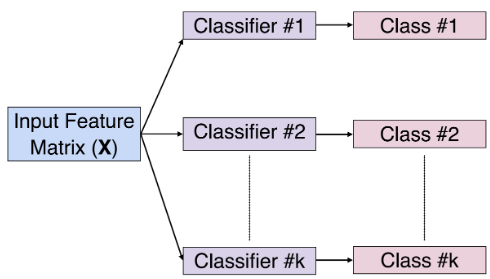

##### **2. How `ClassifierChain` works?**

* A multi-label model that arranges binary classifiers into a chain.
* Way of combining a number of binary classifiers into a single multi-label model.

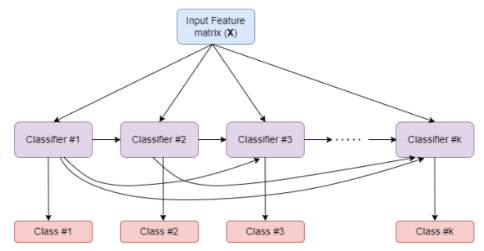

##### **3. Comparison of `MultiOutputClassifier` and `ClassifierChain`**

MultiOutputClassifier                    | ClassifierChain
-----------------------------------------|--------------------------
- Able to estimate a series of target functions that are trained on a single predictor matrix to predict a series of responses. | -Capable of exploiting correlations among targets.
- Allows multiple target variable classifications. | - For a multi-label classification problem with 𝑘 classes, 𝑘 binary classifiers are assigned an integer between 0 and 𝑘-1.
| - These integers define the order of models in the chain.

### **SUMMARY**

* Different types of multi-learning setups:
  * Multi-class
  * Multi-label
  * Multi-output

* `type_of_target` to determine the nature of supplied labels.

* Meta-estimators:
  * multi-class -> OVR, OVA
  * multi-label -> `ClassifierChain`, `MultiOutputClassifier`

## **PART-3**
<u>Evaluating Classifiers</u>

## **Demonstration -1**
<u>Binary class image classsification with Perceptron</u>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

#### **Data Loading and Scaling**

In [ ]:
# it returns Data and Label as pandas dataframe
X,y = fetch_openml('mnist_784', version = 1, return_X_y = True)

In [3]:
X = X.to_numpy()
y = y.to_numpy()

In [5]:
target_names = np.unique(y)
print('Labels : ', target_names)

Labels :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [9]:
print('No. of samples:', X.shape[0])

No. of samples: 70000


In [10]:
print('No. of features:', X.shape[1])

No. of features: 784


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
print('Minimum :', np.min(X))
print('Maximum :', np.max(X))

Minimum : 0.0
Maximum : 255.0


In [13]:
X = MinMaxScaler().fit_transform(X)

# this will scale down the min-max from 0-255 to 0-1

In [14]:
print('Minimum :', np.min(X))
print('Maximum :', np.max(X))

Minimum : 0.0
Maximum : 1.0


#### **Data Splitting**

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.14285714, random_state = 42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

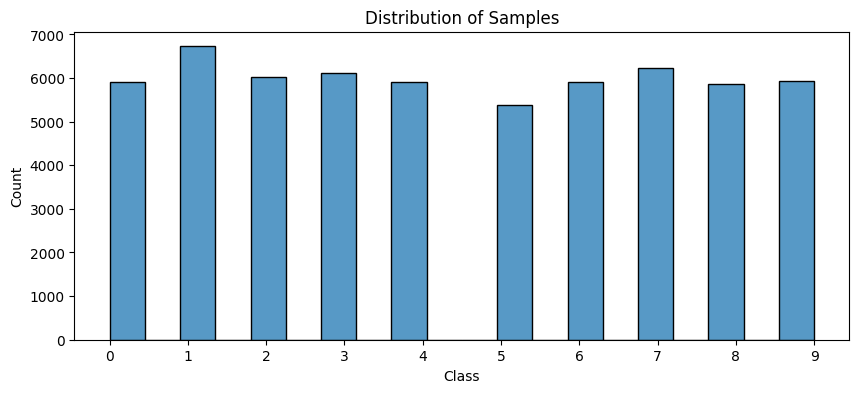

In [21]:
plt.figure(figsize = (10,4))
sns.histplot(data = np.int8(y_train), binwidth = 0.45, bins = 11)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = [0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

 #### **Binary Classification : 0 detector**

In [24]:
# initialize new variable names with all -1

y_train_0 = -1 * np.ones((len(y_train)))
y_test_0 = -1 * np.ones((len(y_test)))

In [28]:
# find indices of digit 0 image

train_index_0 = np.where(y_train == '0')  # original labels are of type str and not int
test_index_0 = np.where(y_test == '0')

In [29]:
#use those indices to modify y_train_0 and y_test_0

y_train_0[train_index_0] = 1
y_test_0[test_index_0] = 1

In [33]:
# checking number of digit 0 image by counting -1 and 1 in TRAIN DATA
# 1 indicate the number of digit 0 image

pd.DataFrame(y_train_0, columns = ['y']).value_counts()

y   
-1.0    54080
 1.0     5920
dtype: int64

In [34]:
# checking number of digit 0 image by counting -1 and 1 in TEST DATA
# 1 indicate the number of digit 0 image

pd.DataFrame(y_test_0, columns = ['y']).value_counts()

y   
-1.0    9017
 1.0     983
dtype: int64

#### **Baseline Model**

In [35]:
num_pos = len(np.where(y_train_0 == 1)[0])
num_neg = len(np.where(y_train_0 == -1)[0])

print('Positive: ', num_pos)
print('Negative: ', num_neg)

Positive:  5920
Negative:  54080


In [36]:
from sklearn.dummy import DummyClassifier

base_clf = DummyClassifier(strategy = 'most_frequent')

In [ ]:
base_clf.fit(X_train, y_train_0)

In [38]:
# Training data accuracy

base_clf.score(X_train, y_train_0)

0.9013333333333333

In [39]:
# Testing data accuracy

base_clf.score(X_test, y_test_0)

0.9017

#### **Perceptron Model**

In [40]:
from sklearn.linear_model import Perceptron

In [41]:
P_clf = Perceptron(max_iter = 100, random_state = 1729)

In [ ]:
P_clf.fit(X_train, y_train_0)

In [43]:
# Dimensions of Weights

P_clf.coef_.shape

(1, 784)

In [44]:
# Bias Term or Intercept

P_clf.intercept_

array([-92.])

In [46]:
# Loss Function

P_clf.loss_function_

In [47]:
# Training Accuracy

P_clf.score(X_train, y_train_0)

0.9929166666666667

In [48]:
# Test Accuracy

P_clf.score(X_test, y_test_0)

0.9921

#### **Confusion Matrix**

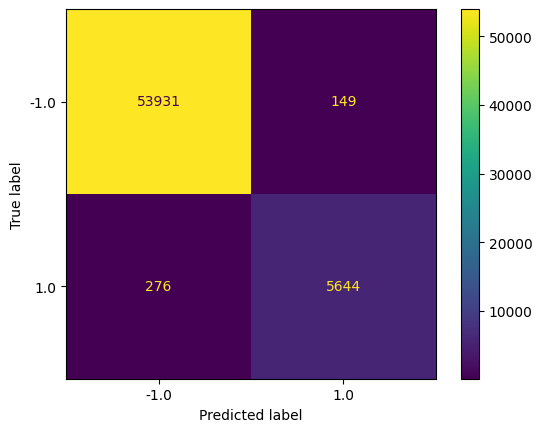

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve

y_hat_train_0 = P_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format = '.5g')
plt.show()